# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [376]:
# Melakukan import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [23]:
# Melakukan loading dataset
mushroom_df = pd.read_csv("../mushrooms_raw.csv")
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Melihat informasi mushroom dataset**

In [24]:
# Melihat informasi dari dataset
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Mengecek nilai kosong pada dataset**

In [25]:
# Mengecek nilai kosong pada dataset
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Melihat ringkasan deskripsi statistik pada dataset**

In [26]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Mengecek data duplikat pada dataset**

In [375]:
print(f"Jumlah duplikasi: {mushroom_df.duplicated().sum()}")

Jumlah duplikasi: 0


**Melihat kolom pada dataset**

In [125]:
mushroom_columns = mushroom_df.columns
print(mushroom_columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


**Melihat nilai unik pada tiap kolom**

In [382]:
mushroom_df_unique_val = {}

for i, col in enumerate(mushroom_columns):
    mushroom_df_unique_val[col] = (mushroom_df[col].unique(), len(mushroom_df[col].unique()))

mushroom_df_unique_val

{'class': (array(['p', 'e'], dtype=object), 2),
 'cap-shape': (array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object), 6),
 'cap-surface': (array(['s', 'y', 'f', 'g'], dtype=object), 4),
 'cap-color': (array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
  10),
 'bruises': (array(['t', 'f'], dtype=object), 2),
 'odor': (array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
  9),
 'gill-attachment': (array(['f', 'a'], dtype=object), 2),
 'gill-spacing': (array(['c', 'w'], dtype=object), 2),
 'gill-size': (array(['n', 'b'], dtype=object), 2),
 'gill-color': (array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
        dtype=object),
  12),
 'stalk-shape': (array(['e', 't'], dtype=object), 2),
 'stalk-root': (array(['e', 'c', 'b', 'r', '?'], dtype=object), 5),
 'stalk-surface-above-ring': (array(['s', 'f', 'k', 'y'], dtype=object), 4),
 'stalk-surface-below-ring': (array(['s', 'f', 'y', 'k'], dtype=object), 4),
 'stalk-color-above-ring': (arra

**Melihat distribusi jamur yang beracun dan edible**

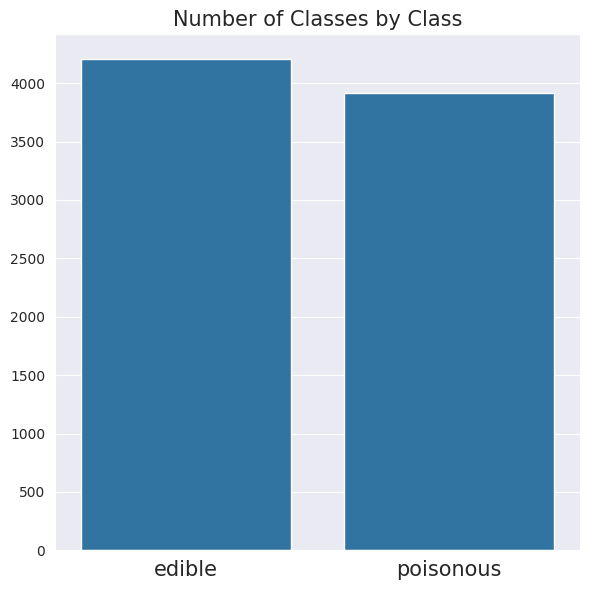

In [135]:
mushroom_class_df = mushroom_df.groupby('class').agg(
    class_count=('class', 'count')
).reset_index()

mushroom_class_df['class'] = mushroom_class_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')

plt.figure(figsize=(6, 6))
sns.p(
    data=mushroom_class_df,
    x='class',
    y='class_count',
    legend=False
)
plt.title("Number of Classes by Class", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=15)
plt.tight_layout()
plt.show()

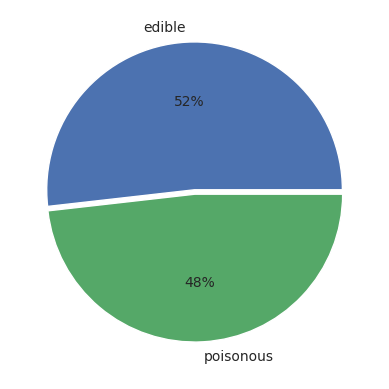

In [270]:
palette_color = sns.color_palette('deep6')

plt.pie(
    x=mushroom_class_df['class_count'],
    labels=mushroom_class_df['class'],
    autopct='%.0f%%',
    colors=palette_color,
    explode=[0.03, 0.0]
)
plt.show()

**Melihat distribusi jamur edible dan beracun berdasarkan habitat**

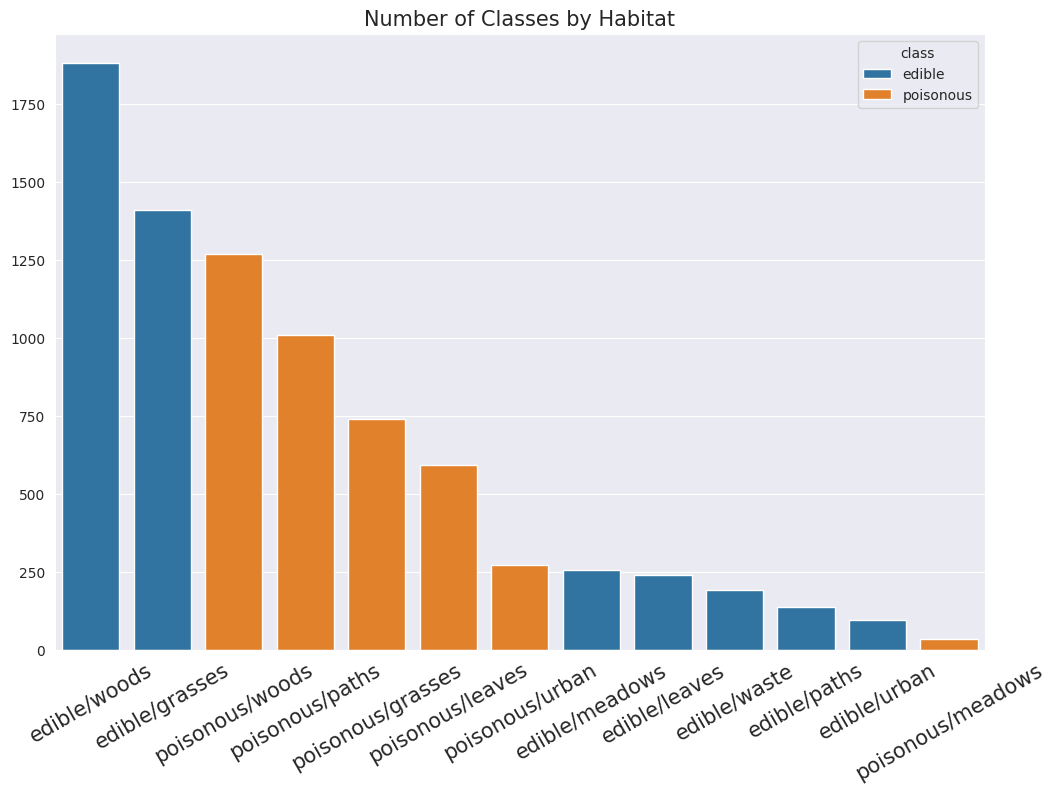

In [238]:
mushroom_habitat_df = mushroom_df.groupby(by=['class', 'habitat']).agg(
    class_count=('class', 'count')
).reset_index()


def habitat_label_to_desc(label):
    list_habitat = {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }

    result = None

    for habitat in list_habitat:
        if label in habitat:
            result = list_habitat[habitat]
            break

    return result


mushroom_habitat_df['class'] = mushroom_habitat_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
mushroom_habitat_df['habitat'] = mushroom_habitat_df['habitat'].apply(habitat_label_to_desc)

mushroom_habitat_df['class_habitat'] = mushroom_habitat_df['class'] + '/' + mushroom_habitat_df['habitat']

plt.figure(figsize=(12, 8))

sns.barplot(
    data=mushroom_habitat_df.sort_values(by='class_count', ascending=False),
    x='class_habitat',
    y='class_count',
    hue='class',
    errorbar=None,
)

plt.title("Number of Classes by Habitat", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=15, rotation=30)
plt.show()

**Melihat distribusi jamur beracun dan edible berdasakran populasi**

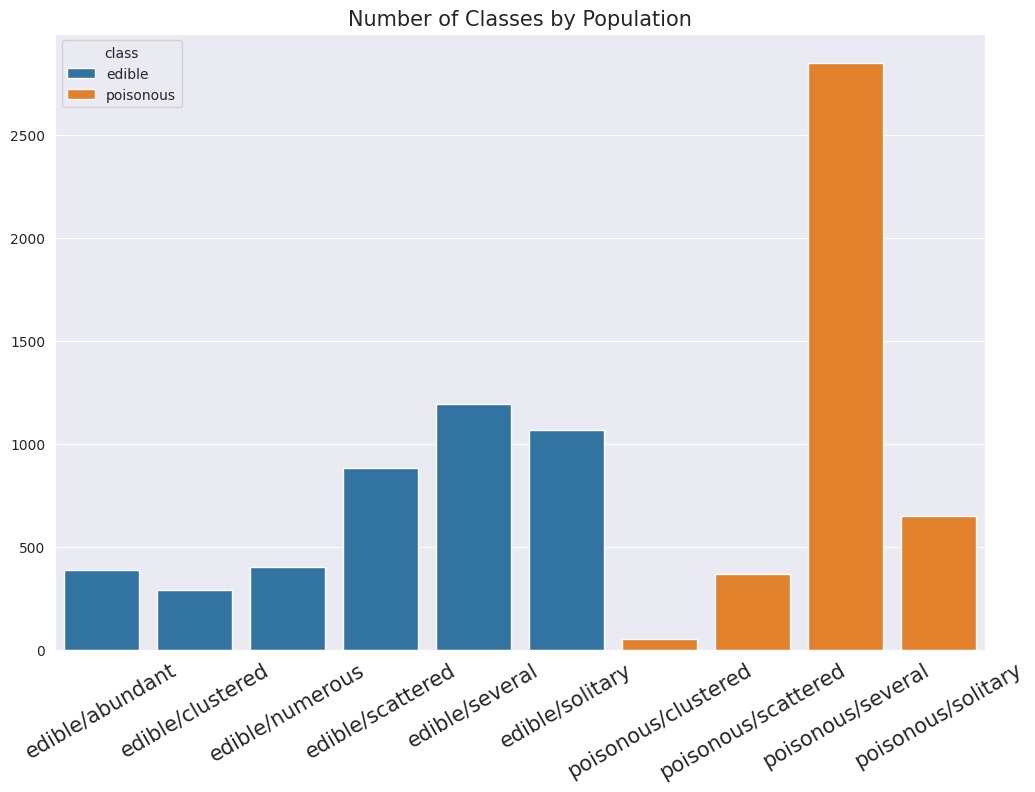

In [355]:
mushroom_population_df = mushroom_df.groupby(by=['class', 'population']).agg(
    class_count=('class', 'count')
).reset_index()


def population_label_to_desc(population_label):
    list_population = {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    }

    result = None

    for population in list_population:
        if population_label == population:
            result = list_population[population]
            break

    return result


mushroom_population_df['class'] = mushroom_population_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
mushroom_population_df['population'] = mushroom_population_df['population'].apply(population_label_to_desc)

mushroom_population_df['class_population'] = mushroom_population_df['class'] + '/' + mushroom_population_df[
    'population']

plt.figure(figsize=(12, 8))

sns.barplot(
    data=mushroom_population_df,
    x='class_population',
    y='class_count',
    hue='class',
    errorbar=None,
)

plt.title("Number of Classes by Population", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=15, rotation=30)
plt.show()

**Melihat distribusi jumlah jamur beracun dan edible berdasarkan baunya**

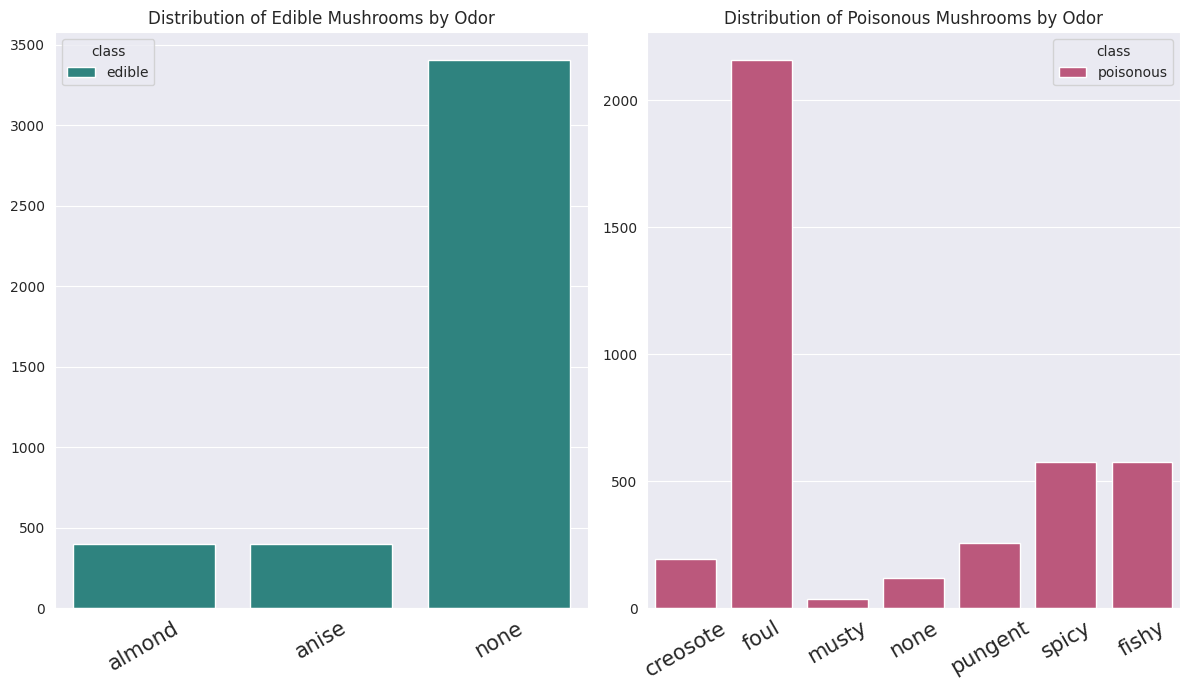

In [329]:
mushroom_odor_df = mushroom_df.groupby(by=['class', 'odor']).agg(
    class_count=('class', 'count')
).reset_index()


def odor_label_to_desc(odor_label):
    odor_list = {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    }

    result = None

    for odor in odor_list:
        if odor_label == odor:
            result = odor_list[odor]
            break

    return result


mushroom_odor_df['class'] = mushroom_odor_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
mushroom_odor_df['odor'] = mushroom_odor_df['odor'].apply(odor_label_to_desc)

split_condition = mushroom_odor_df['class'] == 'edible'

fig, ax = plt.subplots(1, 2, figsize=(12, 7))

sns.barplot(
    data=mushroom_odor_df[split_condition],
    x='odor',
    y='class_count',
    hue='class',
    ax=ax[0],
    palette='viridis'
)
ax[0].set_title('Distribution of Edible Mushrooms by Odor')
ax[0].tick_params(axis='x', labelsize=15, rotation=30)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

sns.barplot(
    data=mushroom_odor_df[~split_condition],
    x='odor',
    y='class_count',
    hue='class',
    ax=ax[1],
    palette='plasma'
)
ax[1].set_title('Distribution of Poisonous Mushrooms by Odor')
ax[1].tick_params(axis='x', labelsize=15, rotation=30)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()

**Melihat distribusi jamur beracun dan edible berdasarkan memarnya**

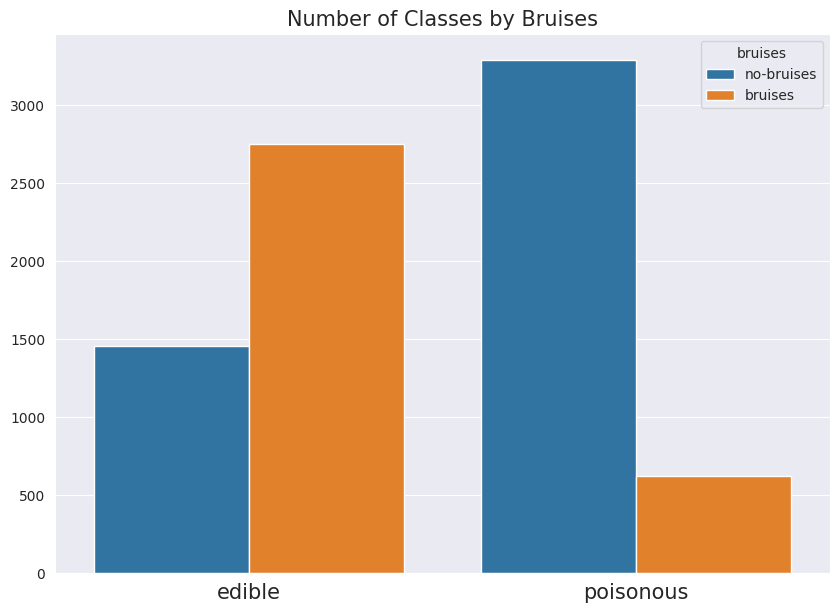

In [352]:
mushroom_bruises_df = mushroom_df.groupby(by=['class', 'bruises']).agg(
    class_count=('class', 'count')
).reset_index()

mushroom_bruises_df['class'] = mushroom_bruises_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
mushroom_bruises_df['bruises'] = mushroom_bruises_df['bruises'].apply(lambda x: 'bruises' if x == 't' else 'no-bruises')

plt.figure(figsize=(10, 7))

sns.barplot(
    data=mushroom_bruises_df,
    x='class',
    y='class_count',
    hue='bruises',
)
plt.title("Number of Classes by Bruises", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=15)

plt.show()

**Melihat distribusi jamur beracun dan edible berdasarkan bentuk tudung jamur**

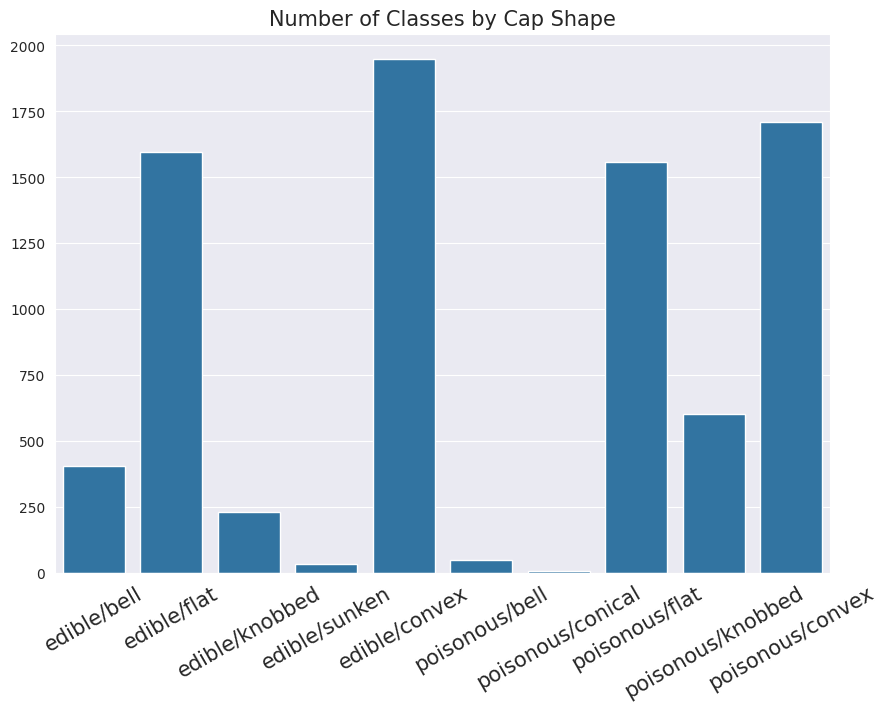

In [369]:
mushroom_cap_shape_df = mushroom_df.groupby(by=['class', 'cap-shape']).agg(
    class_count=('class', 'count')
).reset_index()


def cap_shape_label_to_desc(cap_shape_label):
    list_cap_shape = {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    }

    result = None

    for cap_shape in list_cap_shape:
        if cap_shape_label == cap_shape:
            result = list_cap_shape[cap_shape]
            break

    return result


mushroom_cap_shape_df['class'] = mushroom_cap_shape_df['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
mushroom_cap_shape_df['cap-shape'] = mushroom_cap_shape_df['cap-shape'].apply(cap_shape_label_to_desc)
mushroom_cap_shape_df['class_cap_shape'] = mushroom_cap_shape_df['class'] + '/' + mushroom_cap_shape_df['cap-shape']

plt.figure(figsize=(10, 7))
sns.barplot(
    data=mushroom_cap_shape_df,
    x='class_cap_shape',
    y='class_count',
)

plt.title("Number of Classes by Cap Shape", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=15)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**Melakukan Encoding pada fitur kategorikal**

In [394]:
label_encoder = LabelEncoder()

categorical_features = mushroom_df.columns

mushroom_encoder_df = pd.DataFrame(mushroom_df)

for col in categorical_features:
    mushroom_encoder_df[col] = label_encoder.fit_transform(mushroom_encoder_df[col])

mushroom_encoder_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


**Melakukan Standardisasi**

In [399]:
scaler = MinMaxScaler()

scaler_features_without_class = mushroom_df.drop(columns='class').columns

mushroom_scaler_df = pd.DataFrame(mushroom_encoder_df)

mushroom_scaler_df[scaler_features_without_class] = scaler.fit_transform(mushroom_scaler_df[scaler_features_without_class])

mushroom_scaler_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,1,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


**Menyimpan hasil preprocessing ke berkas csv**

In [400]:
mushroom_scaler_df.to_csv('mushrooms_preprocessing.csv', index=False)